# Visualización de datos en Matplotlib

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("C:/Users/jenny/Documents/GITHUB/Linkedin_courses_bbdd/base_datos_2008.csv", nrows=100000)

In [4]:
data = np.unique(df.Cancelled, return_counts=True)
data

(array([0, 1], dtype=int64), array([98858,  1142], dtype=int64))

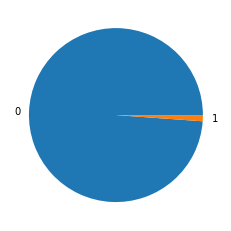

In [5]:
plt.pie(x=data[1], labels=data[0])
plt.show()

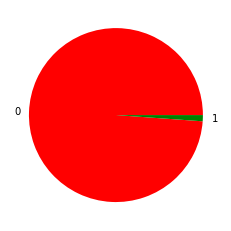

In [6]:
plt.pie(x=data[1], labels=data[0], colors = ["Red","Green"])
plt.show()

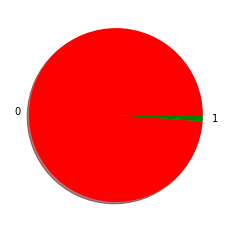

In [7]:
plt.pie(x=data[1], labels=data[0], colors = ["Red","Green"], shadow=True)
plt.show()

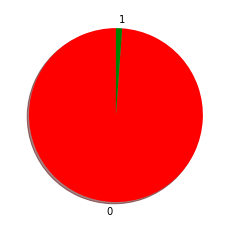

In [8]:
plt.pie(x=data[1], labels=data[0], colors = ["Red","Green"], shadow=True,startangle=90)
plt.show()

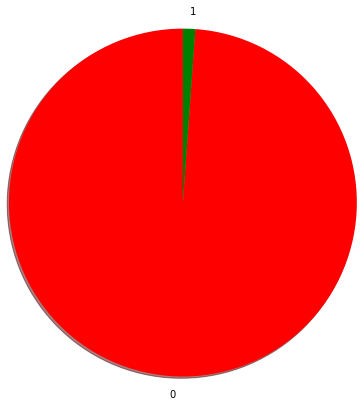

In [9]:
plt.pie(x=data[1], labels=data[0], colors = ["Red","Green"], shadow=True,startangle=90, radius=2)
plt.show()

# Modificar elementos del gráfico en Matplotlib

In [12]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
np.random.seed(0)
df = pd.read_csv("C:/Users/jenny/Documents/GITHUB/Linkedin_courses_bbdd/base_datos_2008.csv", nrows=1000000)
df = df.sample(frac=1).head(100)

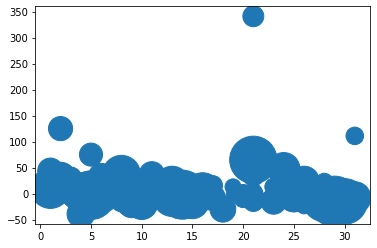

In [13]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance)

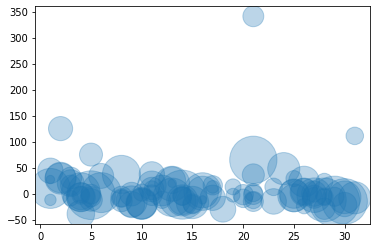

In [14]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha=0.3) #alpha para transparencia

Text(0, 0.5, 'Retraso al llegar')

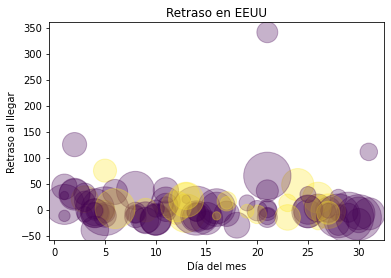

In [26]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha=0.3, c=df.DayOfWeek.isin([6,7]))
plt.title("Retraso en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")

(0.0, 150.0)

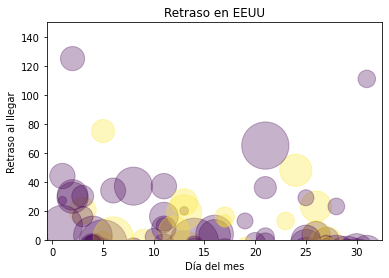

In [27]:
#Si queremos ajustar lo que queremos ver
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha=0.3, c=df.DayOfWeek.isin([6,7]))
plt.title("Retraso en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")
plt.ylim([0,150])


([<matplotlib.axis.XTick at 0x1ff0f1232e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

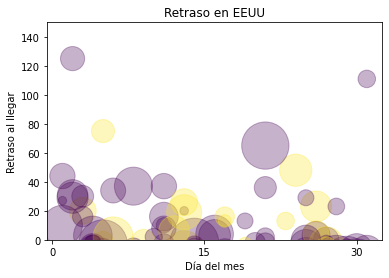

In [29]:
#Si queremos ajustar los puntos en el eje x
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha=0.3, c=df.DayOfWeek.isin([6,7]))
plt.title("Retraso en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")
plt.ylim([0,150])
plt.xticks([0,15,30])

Text(28, 129, 'Mi vuelo')

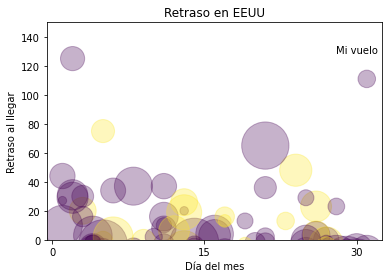

In [30]:
#Si queremos ajustar los puntos en el eje x
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha=0.3, c=df.DayOfWeek.isin([6,7]))
plt.title("Retraso en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")
plt.ylim([0,150])
plt.xticks([0,15,30])
plt.text(x=28,y=129, s="Mi vuelo")

# Etiquetas y leyendas

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/jenny/Documents/GITHUB/Linkedin_courses_bbdd/base_datos_2008.csv", nrows=1000000)
data=np.unique(df.DayOfWeek, return_counts =True)
labs=["Lun", "Mar","Mir","Jue","Vie","Sab", "Dom"]
data

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([137229, 152498, 155928, 159416, 153724, 112352, 128853],
       dtype=int64))

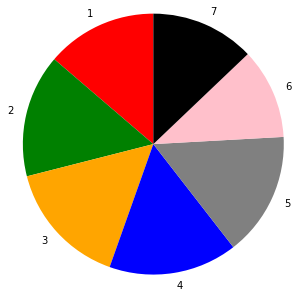

In [35]:
plt.pie(x=data[1],
       labels=data[0],
       radius = 1.5,
       colors=["Red", "Green", "Orange","Blue", "Gray", "Pink", "Black"],
       startangle=90)
plt.show()

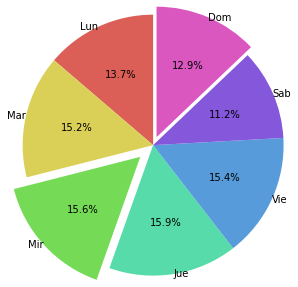

In [43]:
plt.pie(x=data[1],
       labels=labs,
       radius = 1.5,
       colors=sns.color_palette("hls",7),
       explode=(0,0,0.2,0,0,0,0.1),
        startangle=90,
       autopct= "%1.1f%%",
       labeldistance=1)
plt.show()

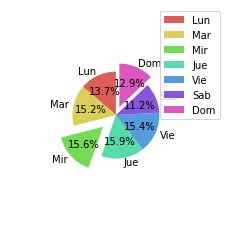

In [47]:
plt.pie(x=data[1],
       labels=labs,
       radius = 0.5,
       colors=sns.color_palette("hls",7),
       explode=(0,0,0.2,0,0,0,0.1),
        startangle=90,
       autopct= "%1.1f%%")
plt.legend(loc="upper right", labels=labs)
plt.show()

[Text(0.5, 0, 'día de la semana'), Text(0, 0.5, 'Número de vuelos')]

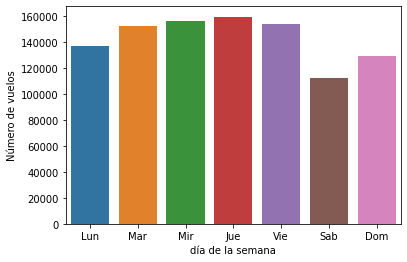

In [49]:
plt=sns.barplot(x=labs, y=data[1])
plt.set(xlabel= "día de la semana", ylabel="Número de vuelos")

# Gráficos para series temporales en Matplotlib

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import time
df = pd.read_csv("C:/Users/jenny/Documents/GITHUB/Linkedin_courses_bbdd/base_datos_2008.csv")
df2=df[df["Origin"].isin(["ATL","HOU","IND"])]
df=df.head(500000)

In [67]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [68]:
times = []
for i in np.arange(len(df)):
    times.append(datetime.datetime(year = 2008, month = df.loc[i,"Month"], day=df.loc[i,"DayofMonth"]))

In [69]:
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [70]:
df["Time"]=times

In [72]:
data=df.groupby(by=["Time"], as_index=False)["DepDelay","ArrDelay"].mean()
data.head()

C:\Users\jenny\AppData\Local\Temp/ipykernel_1316/3325220204.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby(by=["Time"], as_index=False)["DepDelay","ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


C:\Users\jenny\.conda\envs\research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

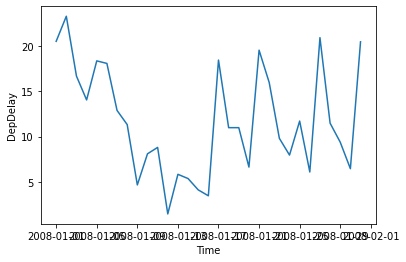

In [73]:
sns.lineplot(data["Time"],data["DepDelay"])

In [76]:
data=df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()
data.head()

C:\Users\jenny\AppData\Local\Temp/ipykernel_1316/1396063810.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time'>

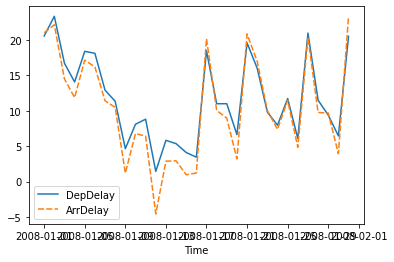

In [77]:
sns.lineplot(data = data)

In [78]:
times = []
for i in df2.index:
    times.append(datetime.datetime(year = 2008, month = df2.loc[i,"Month"], day=df2.loc[i,"DayofMonth"]))

df2["Time"]=times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

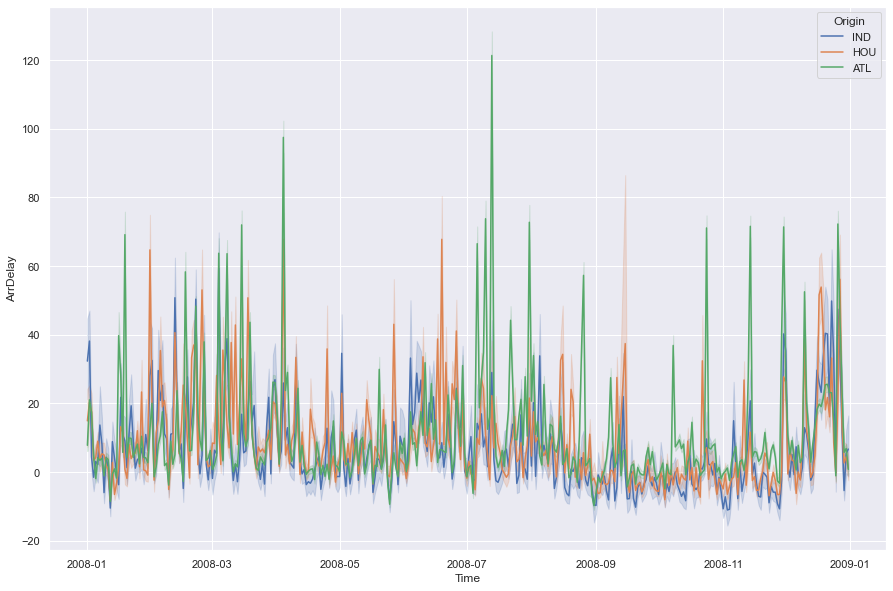

In [79]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Time", y="ArrDelay", hue="Origin", data=df2)

# Histogramas y box plots en Matplotlib

In [80]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
df = pd.read_csv("C:/Users/jenny/Documents/GITHUB/Linkedin_courses_bbdd/base_datos_2008.csv")

In [81]:
df.dropna(inplace=True,subset=["ArrDelay","DepDelay","Distance"])

C:\Users\jenny\.conda\envs\research\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance', ylabel='Density'>

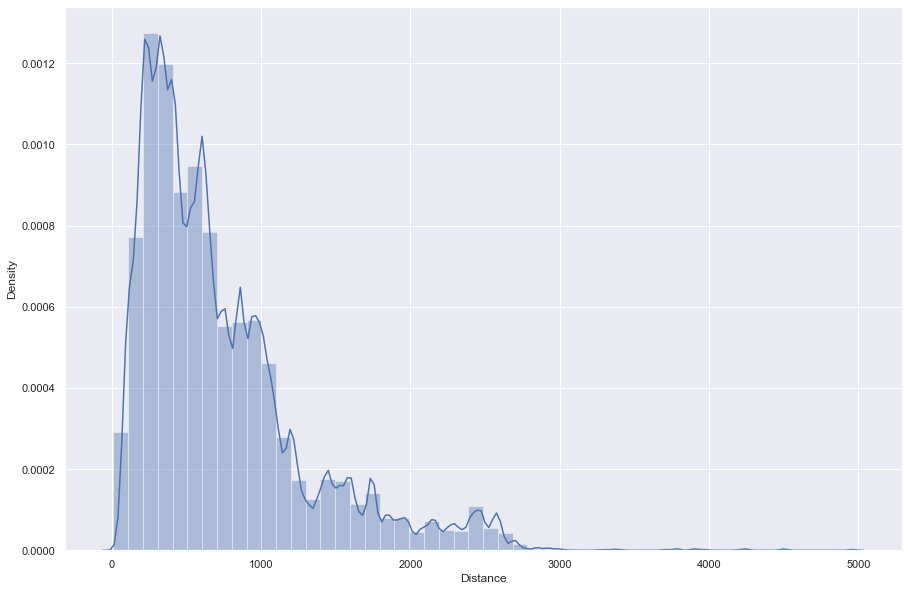

In [82]:
sns.distplot(df["Distance"])

(-300.0, 300.0)

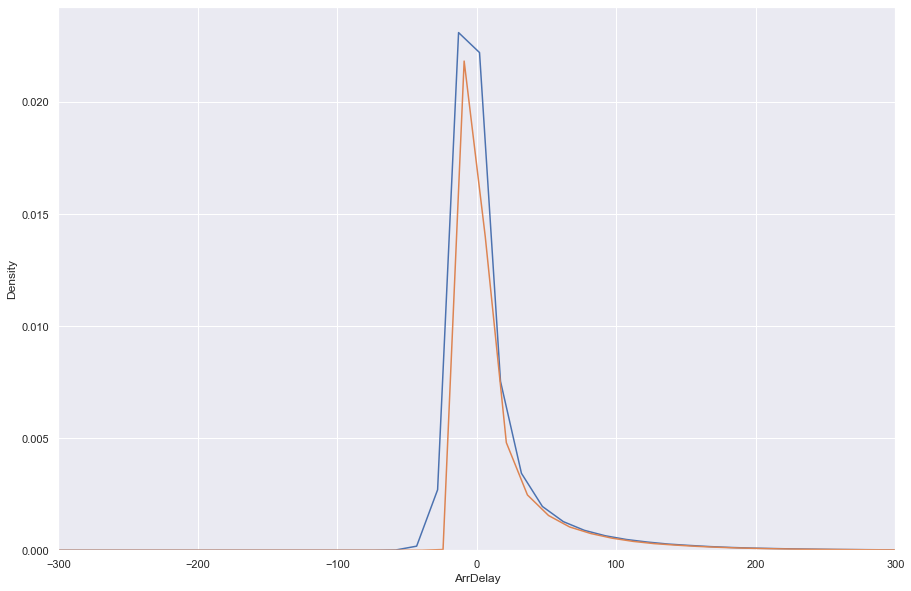

In [83]:
sns.kdeplot(df["ArrDelay"])
sns.kdeplot(df["DepDelay"])
plt.xlim([-300,300])

In [84]:
df2=df[df["Originriginriginriginriginriginrigin"].isin(["ATL","HOU","IND"])].sample(frac = 1).head(500)

(-20.0, 150.0)

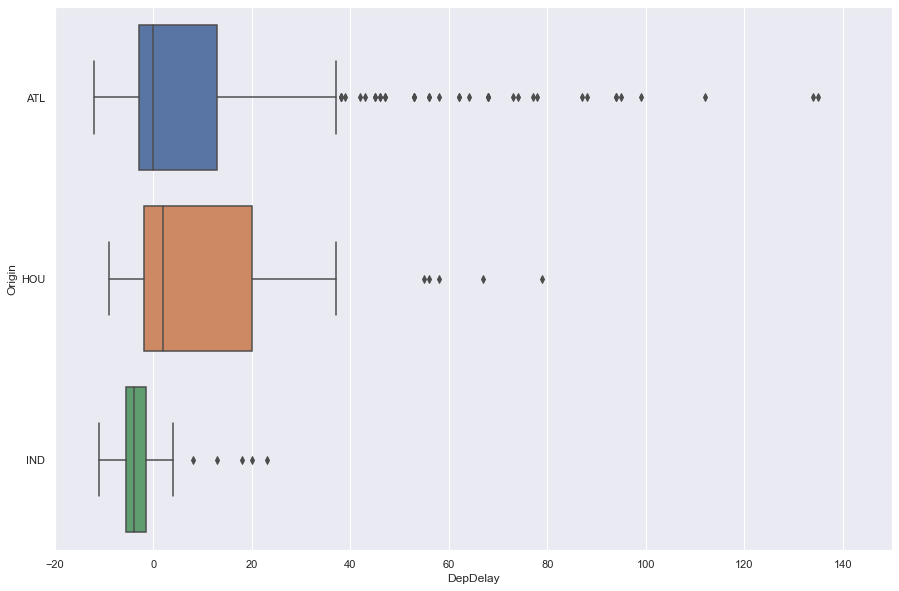

In [87]:
sns.boxplot(x="DepDelay", y="Origin", data=df2)
plt.xlim([-20, 150])

# Nubes de puntos y mapas de calor en Matplotlib

In [88]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
df = pd.read_csv("C:/Users/jenny/Documents/GITHUB/Linkedin_courses_bbdd/base_datos_2008.csv")
df.dropna(inplace=True,subset=["ArrDelay","DepDelay","Distance", "AirTime"])
sns.set(rc={'figure.figsize':(15,10)})

C:\Users\jenny\.conda\envs\research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


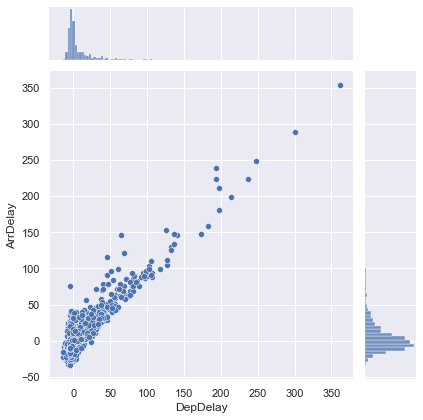

In [90]:
df2=df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)
sns.jointplot(df2["DepDelay"],df2["ArrDelay"])

In [92]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

C:\Users\jenny\.conda\envs\research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


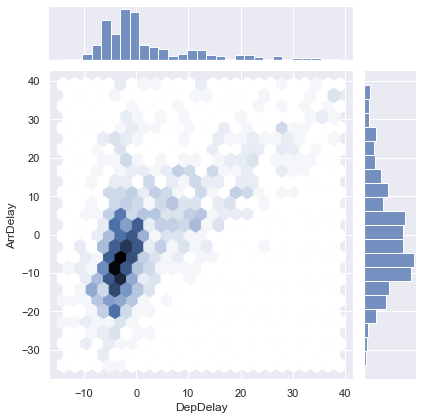

In [94]:
sns.jointplot(df3["DepDelay"],df2["ArrDelay"], kind="hex")

C:\Users\jenny\.conda\envs\research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


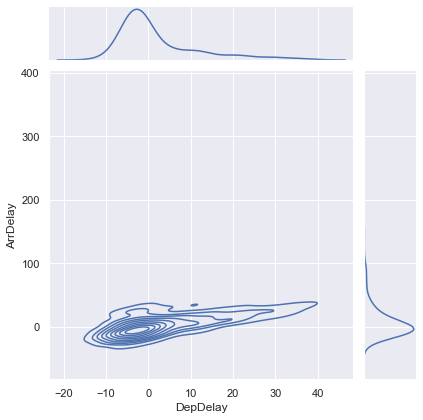

In [96]:
sns.jointplot(df3["DepDelay"],df2["ArrDelay"], kind="kde")

In [99]:
gb_df=pd.DataFrame(df2.groupby(["Origin", "Month"],as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,9.617647
1,ATL,2,11.843373
2,ATL,3,16.322581
3,ATL,4,8.827586
4,ATL,5,5.846154


In [101]:
data= gb_df.pivot("Month","Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,9.617647,21.700000,14.750000
2,11.843373,11.000000,3.571429
3,16.322581,10.250000,4.000000
4,8.827586,8.333333,5.833333
5,5.846154,10.000000,-2.000000
6,16.472222,1.166667,7.777778
7,33.000000,6.416667,1.461538
8,9.283582,16.000000,-3.600000
9,3.263158,2.000000,-5.181818


<AxesSubplot:xlabel='Origin', ylabel='Month'>

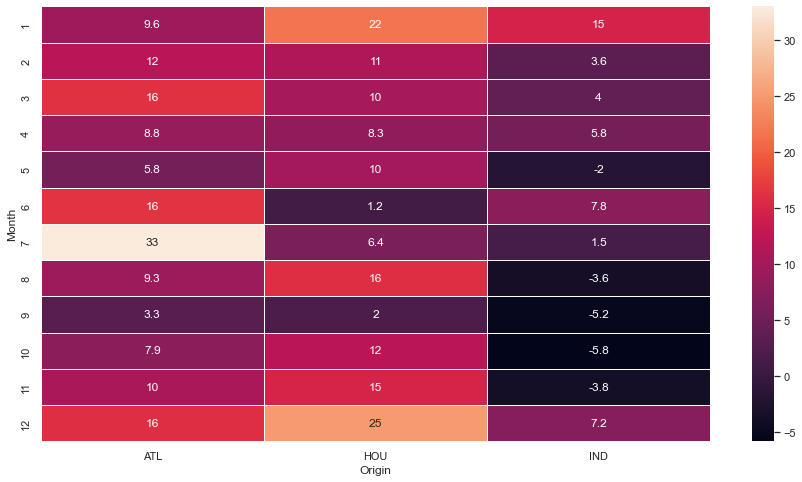

In [102]:
sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(data = data, annot=True, linewidths = .5)

# Introducción al Plotly. Visualización interactiva

https://plotly.com/
Ideal para hacer dashboard
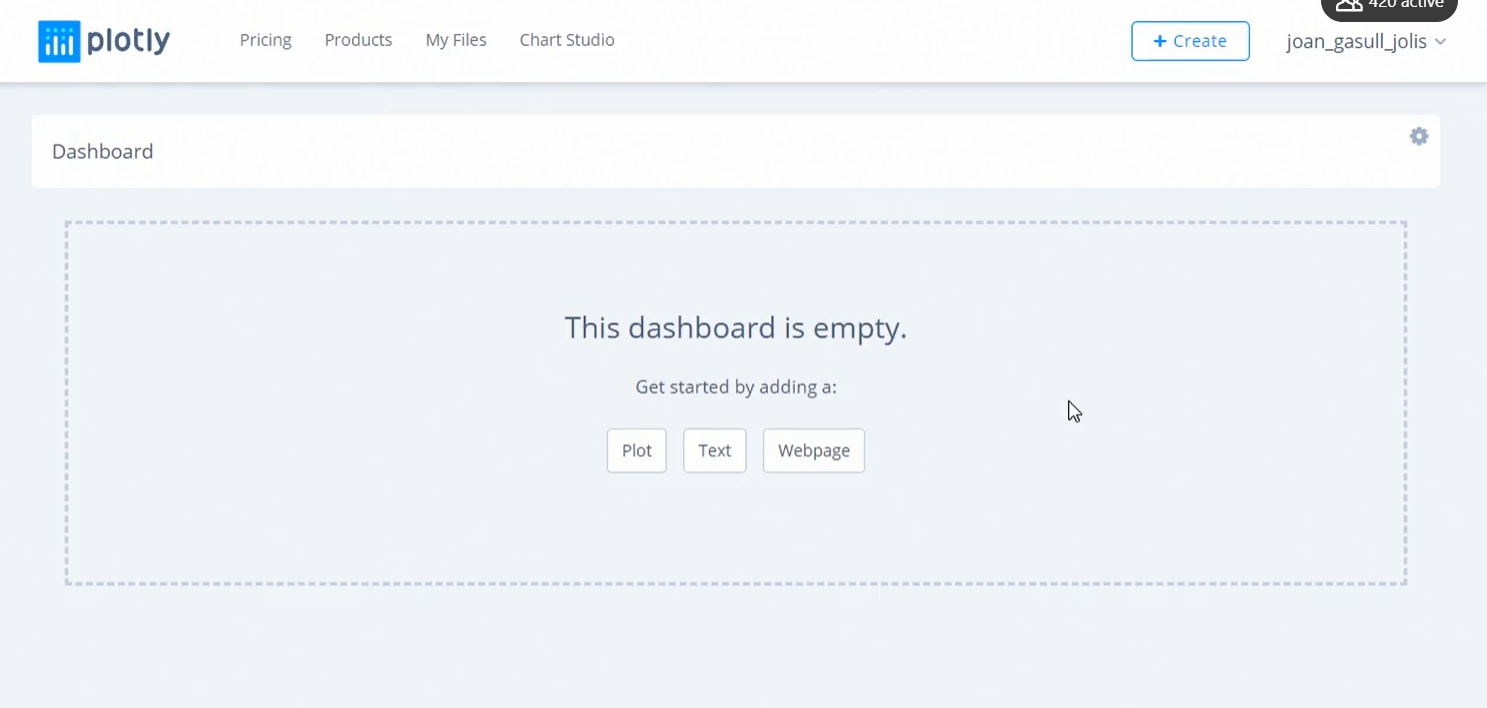